<a href="https://colab.research.google.com/github/CarlosARossi/dataScienceCoder/blob/main/Pre_Entrega_Final_Rossi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre Entrega Final

## 1. Abstracto con motivación y audiencia

### Abstracto

El objetivo de este proyecto es proporcionar información sobre la banda salarial correspondiente a una persona en función de sus datos personales, como rango etario, nivel de estudios, país y otros atributos presentes en el dataset. Además, el proyecto también será adecuado para personal de recursos humanos que buscan establecer compensaciones justas y competitivas en el mercado. Para lograr esto, se realizará un análisis exploratorio de datos para identificar patrones y relaciones entre variables relevantes y se generarán recomendaciones basadas en los insights obtenidos.


### Motivación

La determinación de la banda salarial adecuada es un tema crucial tanto para los profesionales en búsqueda de empleo como para aquellos que desean saber si su salario es competitivo. También es importante para las organizaciones que buscan establecer políticas de compensación justas. Comprender cómo diferentes atributos, como la edad, los estudios, el país, entre otros, afectan los salarios es esencial para todas las partes involucradas. A través del análisis de datos, es posible extraer información valiosa y establecer relaciones significativas entre estas variables y los niveles salariales.

### Audiencia

La audiencia principal de este proyecto incluye tanto a profesionales en búsqueda de conocer su banda salarial adecuada en función de sus características personales, como a profesionales de recursos humanos responsables de establecer políticas de compensación en las organizaciones. La información y recomendaciones proporcionadas serán útiles tanto para aquellos que deseen tener una guía para negociaciones salariales como para aquellos que necesiten información confiable para establecer rangos salariales justos y competitivos. El contenido está diseñado para ser comprensible y útil tanto para personas sin experiencia en análisis de datos como para aquellos familiarizados con conceptos básicos de estadísticas y análisis exploratorio de datos.

## 2. Preguntas que queremos validar mediante el análisis de datos


### Preguntas

1. ¿Existe una relación entre el salario promedio de una empresa y su puntuación en Google Maps?
2. ¿Cuáles son las industrias con los salarios promedios más altos y más bajos?
3. ¿Cual es la distribución salarial por industrias?
4. ¿Hay una diferencia significativa en los salarios promedios entre hombres, mujeres y comunidad LGBTQ+?

## 3. Importación de librerias y datasets

### Librerías

In [71]:
import pandas as pd
import numpy as np
import re
import scipy.stats as stats
from scipy.stats import linregress

import folium
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import learning_curve
import matplotlib.ticker as ticker
from wordcloud import WordCloud

### Dataset

En este proyecto se analizará el conjunto de datos [Global Salary DataSet 2022](https://www.kaggle.com/datasets/ricardoaugas/salary-transparency-dataset-2022). Los datos provienen de una hoja de cálculo de Google que se hizo viral tras ser compartida en LinkedIn por Christen Nino De Guzman, Program Manager en Google. Más de 58.000 personas compartieron sus salarios de forma anónima a través de un formulario de Google.

Debido al alto número de accesos, la hoja de cálculo se volvió lenta y se bloqueaba con frecuencia. Es por esto que alguien la descargo, realizó una limpieza y organización para obtener una visualización amigable. El  conjunto de datos nos proporciona información sobre 32.562 trabajos en 56 países y 15.096 empresas, y se encuentra alojado en Kaggle.



In [72]:
url = 'https://raw.githubusercontent.com/CarlosARossi/dataScienceCoder/main/Datasets/Salary_Data_2022_REV15_2.csv'
salaries = pd.read_csv(url)
salaries

,ID,Timestamp,Age.Range,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Location,Country,...,Currency,Maternity.Paternity.Months,Sick.Days,Office.Days,Open.To.Discuss.Salary,How.many.months.Maternity.or.Paternity.does.your.company.offer.,Gender,X,Diverse.Identity..Optional.,Description
0,1,12/8/2021 3:05,18-21,3.0,GAMING,STREAMER,TWITCH,None,LOS ANGELES CA,US,...,USD,NaN,NaN,NaN,No,as much as i want,Male,NaN,NaN,TWITCH
1,2,12/9/2021 15:49,30-33,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,AESTHETIC CLINIC,Master's Degree,WINNIPEG,CANADA,...,CAD,NaN,NaN,5.0,Yes,NaN,Male,NaN,NaN,AESTHETIC CLINIC
2,3,12/8/2021 2:16,18-21,1.0,ONLINE ARCADE,OWNER,RUST CLASH,High School/GED,SAN DIEGO,US,...,USD,NaN,7.0,NaN,Yes,NaN,Male,NaN,NaN,RUST CLASH
3,4,12/8/2021 5:15,18-21,2.0,CRYPTO,HEAD OF MARKETING,REDACTED,Some College,"TAMPA, FL",US,...,USD,NaN,NaN,NaN,Yes,Not sure,Male,NaN,NaN,REDACTED
4,5,12/8/2021 14:16,34-37,13.0,WINDOW COVERINGS,OWNER,CAROLINA BLIND CRAFTERS,Bachelor's Degree,"CHARLOTTE, NC",US,...,USD,NaN,NaN,3.0,No,None,Female,NaN,NaN,CAROLINA BLIND CRAFTERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32565,32566,1/7/2022 2:27,30-33,9.0,BEAUTY,SOCIAL MEDIA DIRECTOR,UNILEVER,Bachelor's Degree,"LOS ANGELES, CA",US,...,USD,NaN,NaN,2.0,NaN,NaN,Female,NaN,NaN,UNILEVER
32566,32567,1/7/2022 6:09,34-37,14.0,RETAIL,SENIOR MANAGER,RRL,Master's Degree,MUMBAI,INDIA,...,INR,20,7.0,5.0,No,6,Male,NaN,NaN,RRL
32567,32568,1/7/2022 12:38,30-33,5.0,TECHNOLOGY,MARKETING MANAGER,SIEMENS,Master's Degree,LONDON,UK,...,GBP,NaN,8.0,2.0,No,12,Female,NaN,NaN,SIEMENS
32568,32569,1/7/2022 12:40,26-29,4.0,MATERIAL HANDLING,SOLUTIONS CONSULTANT,DEMATIC,Bachelor's Degree,"GRAND RAPIDS, MI",US,...,USD,NaN,NaN,NaN,Yes,NaN,Male,NaN,Hispanic,DEMATIC


In [73]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32570 entries, 0 to 32569
Data columns (total 24 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   ID                                                               32570 non-null  int64  
 1   Timestamp                                                        32570 non-null  object 
 2   Age.Range                                                        32549 non-null  object 
 3   Years.of.Experience                                              32053 non-null  float64
 4   Industry                                                         32355 non-null  object 
 5   Job.Title                                                        32566 non-null  object 
 6   Company.Name                                                     32568 non-null  object 
 7   Education                               

Al realizar un análisis inicial del conjunto de datos original [Salary_Data_2022_REV15_2](https://www.kaggle.com/datasets/ricardoaugas/salary-transparency-dataset-2022), se observa que los datos provienen de diversas fuentes y países, cada uno con su propia moneda y forma de expresar el salario. Por lo tanto, será necesario agregar información adicional al conjunto de datos para estandarizar la moneda y el período salarial en una única forma de representación.

## 4. Análisis Exploratorio de Datos (EDA)

### 4.1. Agregado de columna **Exchange.rate.to.USD**

Se realizó una búsqueda de las tasas de conversión a USD para las diferentes monedas identificadas en la columna **Currency** del conjunto de datos original, tomando como referencia la fecha del 20/12/2021. Esta fecha se seleccionó por estar en el punto medio del período en el que se recopiló la información del dataset.

Utilizando la información obtenida, se generó una lista de tuplas y posteriormente se creó un diccionario mediante el uso de la función dict().

Luego, basandose en la columna **Currency** como clave en el diccionario y con el método map de pandas se asignaron los valores correspondientes de la tasa de conversión a USD al dataset **salaries** en la nueva columna llamada **Exchange.rate.to.USD**

In [74]:
exchange_rates = [
    ('AED', 3.67235),
    ('ARS', 176.55000),
    ('AUD', 1.40301),
    ('BHD', 0.37463),
    ('CAD', 1.28848),
    ('CNY', 6.37440),
    ('COP', 3966.91000),
    ('DKK', 6.61604),
    ('EGP', 15.71170),
    ('EUR', 0.88989),
    ('GBP', 0.75534),
    ('GHS', 6.11800),
    ('HKD', 7.80164),
    ('HUF', 326.57800),
    ('ILS', 3.11920),
    ('INR', 75.87400),
    ('KRW', 1186.63000),
    ('MXN', 20.79900),
    ('NGN', 409.76500),
    ('RON', 4.39980),
    ('RSD', 104.37400),
    ('SAR', 3.74524),
    ('SEK', 9.12911),
    ('SGD', 1.36656),
    ('TRY', 16.39630),
    ('USD', 1.000),
    ('ZAR', 15.88200)
]

# Creación de un diccionario a partir de la lista de tasas de cambio
exchange_rates_dict = dict(exchange_rates)

# Agregado de la columna "Exchange.rate.to.USD" al dataset "salaries"
salaries['Exchange.rate.to.USD'] = salaries['Currency'].map(exchange_rates_dict)


### 4.2. Agregado de columna **SalaryUSD**

Para estandarizar los salarios en una misma moneda (USD), se realizó una división de los valores de la columna **Salary** por los correspondientes valores de la columna **Exchange.rate.to.USD**. El resultado se almacenó en una nueva columna denominada **SalaryUSD**.

El fin de este proceso es garantizar que todos los salarios del dataset estén representados de manera uniforme, lo que facilitará la comparación y el análisis de los datos.

In [75]:
# Agregado de la columna "SalaryUSD" al dataset "salaries"
salaries['SalaryUSD'] = salaries['Salary'] / salaries['Exchange.rate.to.USD']

### 4.3. Agregado de columna **Salary.Period**

Tras observar valores salariales promedio inusualmente altos en la columna **SalaryUSD** en algunos países, se determinó que esto se debía a la utilización de diferentes períodos salariales en cada país. Con el fin de mejorar el análisis, se identificó qué países utilizaban un período anual y se creó un  array con dichos países. Aquellos que no se encontraban en el array fueron marcados como salarios mensuales.

Esta nueva identificación del salario se agregó en la columna **Salary.Period** y  permitirá una comparación más precisa y consistente de los salarios entre los países en el conjunto de datos.

In [76]:
countries_with_annual_period = ['AFGHANISTAN', 'AMERICAN SAMOA', 'AUSTRALIA', 'BAHRAIN', 'BELGIUM', 'CANADA', 'CARMEL', 'CHINA', 'CZECH REPUBLIC', 'DEVON', 'ESTONIA', 'FAYETTE', 'FRANCE', 'GERMANY', 'HONDURAS', 'INDONESIA', 'ISRAEL', 'ITALY', 'JAPAN', 'LEBANON', 'LUXEMBOURG', 'MARICOPA', 'MEXICO', 'MOROCCO', 'NORTH MACEDONIA', 'PANAMA', 'PERU', 'PORTUGAL', 'QATAR', 'SAUDI ARABIA', 'SINGAPORE', 'SOUTH AFRICA', 'SPAIN', 'TARRANT', 'UK', 'UNITED ARAB EMIRATES', 'US', 'VENTURA']

# Agregado de la columna "Salary.Period" al dataset "salaries"
salaries['Salary.Period'] = salaries['Country'].apply(lambda x: 'Annual' if x in countries_with_annual_period else 'Monthly')

### 4.4. Agregado de columna **Monthly.SalaryUSD**


Tomando como base la columna **Salary.Period**, se realizó una operación de transformación en los registros que tenían el valor "Annual" en la columna. Se dividió el valor de la columna **SalaryUSD** por 12 y el resultado se almacenó en una nueva columna llamada **Monthly.SalaryUSD**. Por otro lado, los registros que tenían el valor "Monthly" en la columna **Salary.Period** se mantuvieron sin cambios y se copiaron directamente en la columna **Monthly.SalaryUSD**.

Esta transformación permitió estandarizar todos los salarios en una representación mensual para facilitar el análisis comparativo.

In [77]:
salaries['Monthly.SalaryUSD'] = salaries.apply(lambda row: row['SalaryUSD'] / 12 if row['Salary.Period'] == 'Annual' else row['SalaryUSD'], axis=1)

### 4.5. Limpieza de salarios con valor 0

Debido a la presencia de valores iguales a 0 en la columna "Monthly.SalaryUSD" del dataset, se tomó la decisión de eliminar esas filas con el fin de reducir el error al calcular el promedio.

Al eliminar estas líneas, se garantiza que el análisis se base en datos más precisos y representativos, evitando la distorsión que podría ocasionar la inclusión de salarios con valor cero.

In [78]:
# Contar los valores igual a 0 en la columna Monthly.SalaryUSD
count_zero = (salaries['Monthly.SalaryUSD'] == 0).sum()

print("Cantidad de valores igual a 0 en Monthly.SalaryUSD:", count_zero)


Cantidad de valores igual a 0 en Monthly.SalaryUSD: 808


In [79]:
# Filtrar las filas que tienen Monthly.SalaryUSD diferente de 0
salaries_filtered = salaries[salaries['Monthly.SalaryUSD'] != 0]

# Contar los valores igual a 0 en la columna Monthly.SalaryUSD
count_zero = (salaries_filtered['Monthly.SalaryUSD'] == 0).sum()

print("Cantidad de valores igual a 0 en Monthly.SalaryUSD:", count_zero)


Cantidad de valores igual a 0 en Monthly.SalaryUSD: 0


### 4.6. Eliminado de columnas con datos no significativos



In [80]:
# Listar las columnas del dataset
columns = salaries_filtered.columns

# Imprimir las columnas
print(columns)

Index(['ID', 'Timestamp', 'Age.Range', 'Years.of.Experience', 'Industry',
       'Job.Title', 'Company.Name', 'Education', 'Location', 'Country',
       'Salary', 'Annual.Bonus', 'Annual.Average.of.RSUs', 'Signing.Bonus',
       'Currency', 'Maternity.Paternity.Months', 'Sick.Days', 'Office.Days',
       'Open.To.Discuss.Salary',
       'How.many.months.Maternity.or.Paternity.does.your.company.offer.',
       'Gender', 'X', 'Diverse.Identity..Optional.', 'Description',
       'Exchange.rate.to.USD', 'SalaryUSD', 'Salary.Period',
       'Monthly.SalaryUSD'],
      dtype='object')


In [81]:
# Selecciono las columnas deseadas
columns = ['Age.Range',
           'Years.of.Experience',
           'Industry',
           'Job.Title',
           'Company.Name',
           'Education',
           'Country',
           'Gender',
           'Monthly.SalaryUSD',
           'Salary.Period']

salaries_filtered = salaries_filtered[columns]

salaries_filtered

,Age.Range,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Country,Gender,Monthly.SalaryUSD,Salary.Period
0,18-21,3.0,GAMING,STREAMER,TWITCH,None,US,Male,40833.333333,Annual
1,30-33,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,AESTHETIC CLINIC,Master's Degree,CANADA,Male,31691.088207,Annual
2,18-21,1.0,ONLINE ARCADE,OWNER,RUST CLASH,High School/GED,US,Male,40000.000000,Annual
3,18-21,2.0,CRYPTO,HEAD OF MARKETING,REDACTED,Some College,US,Male,40000.000000,Annual
4,34-37,13.0,WINDOW COVERINGS,OWNER,CAROLINA BLIND CRAFTERS,Bachelor's Degree,US,Female,40000.000000,Annual
...,...,...,...,...,...,...,...,...,...,...
31757,30-33,5.0,ECOMMERCE,DESIGN MANAGER,MIS,Bachelor's Degree,INDIA,Male,0.092258,Monthly
31758,22-25,5.0,HOTEL/RESTAURANT,MANAGER/CHEF,CASA BAROLO,Bachelor's Degree,ROMANIA,Female,1.363698,Monthly
31759,58+,NaN,SPORTS,ANALYST,ESPN,None,US,Female,0.083333,Annual
32568,26-29,4.0,MATERIAL HANDLING,SOLUTIONS CONSULTANT,DEMATIC,Bachelor's Degree,US,Male,9166.666667,Annual


### 4.7. Conclusión EDA

En este proyecto, se agregaron columnas de conversión de moneda y estandarización salarial al dataset original. Además, se identificaron los países con períodos salariales anuales y se generaron columnas correspondientes. También se eliminaron los salarios con valor 0 para mejorar la precisión. Estos pasos nos permitirán preparar el modelo y cumplir con el objetivo de proporcionar información sobre la banda salarial basada en datos personales.

Valores mensuales y anuales antes y despues del filtrado

In [82]:
count_salary_period_1 = salaries['Salary.Period'].value_counts()
count_salary_period_2 = salaries_filtered['Salary.Period'].value_counts()

monthly_count_1 = count_salary_period_1['Monthly']
annual_count_1 = count_salary_period_1['Annual']

monthly_count_2 = count_salary_period_2['Monthly']
annual_count_2 = count_salary_period_2['Annual']

print(f"Valores antes del filtrado: \n Monthly: {monthly_count_1} - Annual: {annual_count_1}")
print(f"Valores luego del filtrado: \n Monthly: {monthly_count_2} - Annual: {annual_count_2}")

Valores antes del filtrado: 
 Monthly: 75 - Annual: 32495
Valores luego del filtrado: 
 Monthly: 47 - Annual: 31715


## 5. Data Wrangling

### 5.1. Valores Faltante

In [83]:
# Controlo cuantos NaN hay en las columnas de mi dataset
for column in columns:
    nan_count = salaries_filtered[column].isnull().sum()
    print(f"{column} tiene {nan_count} NaN")

Age.Range tiene 20 NaN
Years.of.Experience tiene 502 NaN
Industry tiene 204 NaN
Job.Title tiene 4 NaN
Company.Name tiene 2 NaN
Education tiene 0 NaN
Country tiene 0 NaN
Gender tiene 0 NaN
Monthly.SalaryUSD tiene 0 NaN
Salary.Period tiene 0 NaN


Se realizará la eliminación de filas que contengan valores faltantes en las columnas elegidas en el punto anterior.

Esto se realizará por las siguientes razones:
1. **Integridad de los datos:** Al eliminar las filas con valores faltantes, garantizaremos que los datos restantes sean consistentes y confiables, evitando sesgos o distorsiones en los análisis y modelos posteriores.

2. **Simplificación del análisis:** Se evitara tener que lidiar con técnicas de imputación o llenado de datos faltantes, lo que simplificará el flujo de trabajo y facilitará el análisis exploratorio y los cálculos posteriores.

3. **Enfoque en variables clave:** Al seleccionar solo las columnas clave sin valores faltantes, podremos centrarnos en las variables más importantes para el estudio, lo que te brindará una visión más precisa y significativa de los factores que influyen en el salario mensual.

In [84]:
# Seleccionar las columnas deseadas
columns_to_check = ['Age.Range',
                    'Years.of.Experience',
                    'Industry',
                    'Job.Title',
                    'Company.Name',
                    ]

salaries_without_NaN = salaries_filtered.dropna(subset=columns_to_check)

salaries_without_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31043 entries, 0 to 32569
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age.Range            31043 non-null  object 
 1   Years.of.Experience  31043 non-null  float64
 2   Industry             31043 non-null  object 
 3   Job.Title            31043 non-null  object 
 4   Company.Name         31043 non-null  object 
 5   Education            31043 non-null  object 
 6   Country              31043 non-null  object 
 7   Gender               31043 non-null  object 
 8   Monthly.SalaryUSD    31043 non-null  float64
 9   Salary.Period        31043 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.6+ MB


### 5.2. Reducción de Instancias



Se llevará a cabo un análisis detallado de las siguientes columnas:
1. Age.Range
2. Years.of.Experience
3. Industry
4. Job.Title
5. Education
6. Country
7. Gender

Estó se realizará para comprender mejor los datos relacionados con la demografía, la experiencia laboral, la industria, el título laboral, el nivel educativo, el país y el género de los individuos en el conjunto de datos. Esta exploración permitirá obtener información relevante para el posterior modelado y predicción del salario.

Una vez realizado el análisis, se procederá a reducir las instancias del conjunto de datos, seleccionando un subconjunto de filas basado en criterios relevantes. La reducción de instancias nos permitirá enfocarnos en las características clave y construir un modelo más preciso y eficaz para predecir el salario en función de las variables seleccionadas.

#### 5.2.1. Rango de edades [Age.Range]

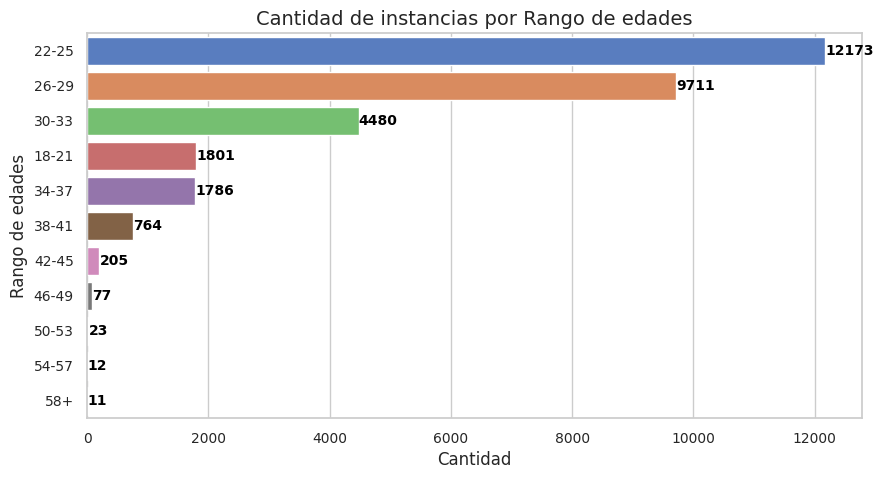

In [85]:
# Contar las instancias únicas de Age.Range
age_range_counts = salaries_without_NaN['Age.Range'].value_counts()

# Ordenar en orden descendente
age_range_counts = age_range_counts.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=age_range_counts.values, y=age_range_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(age_range_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold', fontsize=10)

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Rango de edades', fontsize=12)
plt.title('Cantidad de instancias por Rango de edades', fontsize=14)

# Cambiar el tamaño de las marcas de los ejes X e Y
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Al tener 11 variables en 'Age.Range', se podrían generar 11 nuevas columnas binarias correspondientes a cada rango de edad (One Hot Encoding), lo que permitirá utilizar estas variables en los modelos de aprendizaje sin problemas.

#### 5.2.2. Años de experiencia [Years.of.Experience]

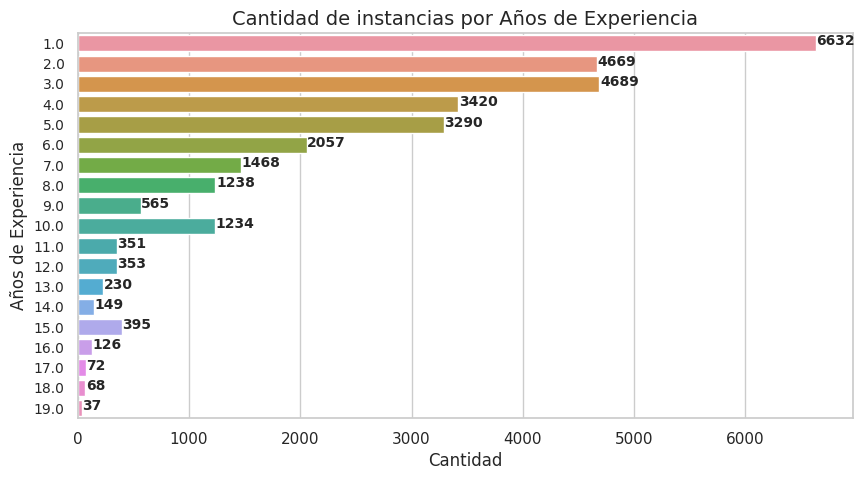

In [86]:
# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
ax = sns.countplot(y='Years.of.Experience', data=salaries_without_NaN)

plt.yticks(fontsize=10)

# Agregar el número de cuentas en cada barra con tamaño de letra personalizado
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width()+5, p.get_y()+0.5), fontsize=10, weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Años de Experiencia', fontsize=12)
plt.title('Cantidad de instancias por Años de Experiencia', fontsize=14)
plt.show()

La columna 'Years.of.Experience' es una variable ordinal, lo que implica que tiene un orden inherente y representación numérica que refleja el nivel de experiencia.

#### 5.2.3. Industrias [Industry]

Debido a la gran cantidad de instancias únicas en la columna 'Industry', se aplicará un enfoque de agrupación utilizando coincidencia de cadenas y expresiones regulares.

El objetivo es reducir la diversidad de categorías, creando grupos más amplios y generalizados.

Esto facilitará el análisis y la interpretación de los datos al identificar palabras clave y términos relacionados en las categorías existentes.

Al agrupar las industrias de manera más general, se obtendrá una mejor comprensión de los patrones y tendencias generales en los datos.

In [87]:
# Calcular la frecuencia de las categorías en Industry
industry_counts = salaries_without_NaN['Industry'].value_counts()

print("Cantidad de Industrias:", len(salaries_without_NaN['Industry'].unique()))
industry_counts

Cantidad de Industrias: 5550


TECH                              3288
HEALTHCARE                        1603
FINANCE                           1073
EDUCATION                          812
CONSULTING                         739
                                  ... 
DIGTECHAL TECH                       1
PACKAGING / MANUFACTURING            1
PAID DIGTECHAL MEDIA MARKETING       1
GLASS                                1
HOTEL/RESTAURANT                     1
Name: Industry, Length: 5550, dtype: int64

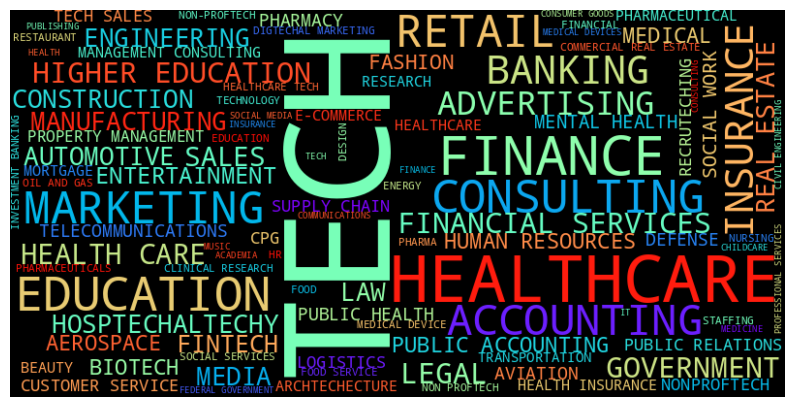

In [88]:
# Crea el objeto WordCloud con las palabras y sus respectivas frecuencias
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='rainbow',
                      contour_color='black', contour_width=1, max_words=100).generate_from_frequencies(industry_counts)

# Configura el gráfico
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Muestra el gráfico
plt.show()

Se agruparán las industrias basándose en palabras clave obtenidas en el gráfico anterior del tipo Word Cloud. Esto mejorará la interpretación y análisis al agrupar categorías más comunes.

In [89]:
# Crear una copia del dataset anterior
salaries_re_industry = salaries_without_NaN.copy()

groupings = {
    'Technology': ['tech', 'digital', 'software', 'hardware', 'IT', 'internet', 'engineering'],
    'Healthcare': ['health', 'medical', 'pharmaceutical', 'medicine', 'physician', 'nursing', 'dentistry', 'doctor', 'pharmacy', 'nurse', 'dental', 'clinical', 'social work','pharma'],
    'Retail': ['retail', 'shopping', 'e-commerce', 'brick and mortar', 'ecommerce', 'sales','grocery'],
    'Manufacturing': ['manufacturing', 'production', 'factory', 'assembly','CPG'],
    'Finance': ['finance', 'banking', 'investments', 'accounting', 'financial', 'insurance', 'mortgage'],
    'Education & Research': ['education', 'learning', 'academia', 'teaching', 'research'],
    'Transportation': ['transportation', 'logistics', 'shipping', 'delivery','transport'],
    'Food & Beverage': ['food', 'beverage', 'restaurant', 'catering'],
    'Hospitality': ['hospitality', 'tourism', 'hotel', 'travel'],
    'Entertainment': ['entertainment', 'media', 'film', 'music', 'creative', 'content creator', 'TV'],
    'Energy': ['energy', 'utilities', 'renewable', 'power','oil','gas'],
    'Construction': ['construction', 'building', 'architecture', 'contracting'],
    'Consulting': ['consulting', 'advisory', 'strategy', 'management'],
    'Real Estate': ['real estate', 'property', 'housing', 'development'],
    'Agriculture': ['agriculture', 'farming', 'agribusiness', 'crop'],
    'Government': ['government', 'public sector', 'civil service', 'administration', 'defense'],
    'Administrative': ['administrative', 'human resources', 'social work','customer service', 'HR','human services','social services'],
    'Non-profit': ['non-profit', 'charity', 'NGO', 'volunteer'],
    'Media': ['media', 'communication', 'journalism', 'publishing', 'public relations'],
    'Automotive': ['automotive', 'vehicles', 'car', 'automobile'],
    'Aerospace': ['aerospace', 'aviation', 'aeronautics', 'space'],
    'Sports': ['sports', 'athletics', 'fitness', 'recreation','sport'],
    'Legal Services': ['legal', 'law', 'attorney', 'legal services'],
    'Marketing': ['marketing', 'advertising', 'content marketing', 'digital marketing'],
    'Fashion & Beauty': ['fashion', 'clothing', 'apparel', 'design','beauty','cosmetics'],
    'Data & AI': ['data', 'AI', 'big data', 'data science', 'analytics'],
    'Pets': ['pets', 'animals', 'pet care', 'veterinary', 'pet', 'animal', 'vet'],
    'Gaming':['gaming', 'game', 'games', 'video game', 'arcade','esport']
}



# Función para agrupar categorías basadas en patrones de coincidencia
def group_industry(category):
    for group, patterns in groupings.items():
        for pattern in patterns:
            if re.search(pattern, category, re.IGNORECASE):
                return group
    return 'Others'

# Aplicar la función de agrupación a la columna 'Industry' y crear una nueva columna 'GroupedIndustry'
salaries_re_industry['GroupedIndustry'] = salaries_re_industry['Industry'].apply(group_industry)


# Calcular la frecuencia de las categorías en GroupedIndustry
industry_counts = salaries_re_industry['GroupedIndustry'].value_counts()
with pd.option_context('display.max_rows', None):
    print(industry_counts)


print("Cantidad de Industrias Agrupadas es:", len(salaries_re_industry['GroupedIndustry'].unique()))


Technology              7519
Healthcare              4068
Finance                 4061
Others                  2695
Education & Research    1615
Retail                  1530
Marketing               1323
Consulting              1255
Entertainment            815
Government               729
Legal Services           575
Manufacturing            498
Administrative           497
Fashion & Beauty         494
Media                    431
Real Estate              413
Food & Beverage          405
Automotive               399
Construction             340
Data & AI                295
Aerospace                290
Transportation           265
Energy                   241
Sports                    84
Hospitality               74
Gaming                    51
Agriculture               48
Pets                      33
Name: GroupedIndustry, dtype: int64
Cantidad de Industrias Agrupadas es: 28


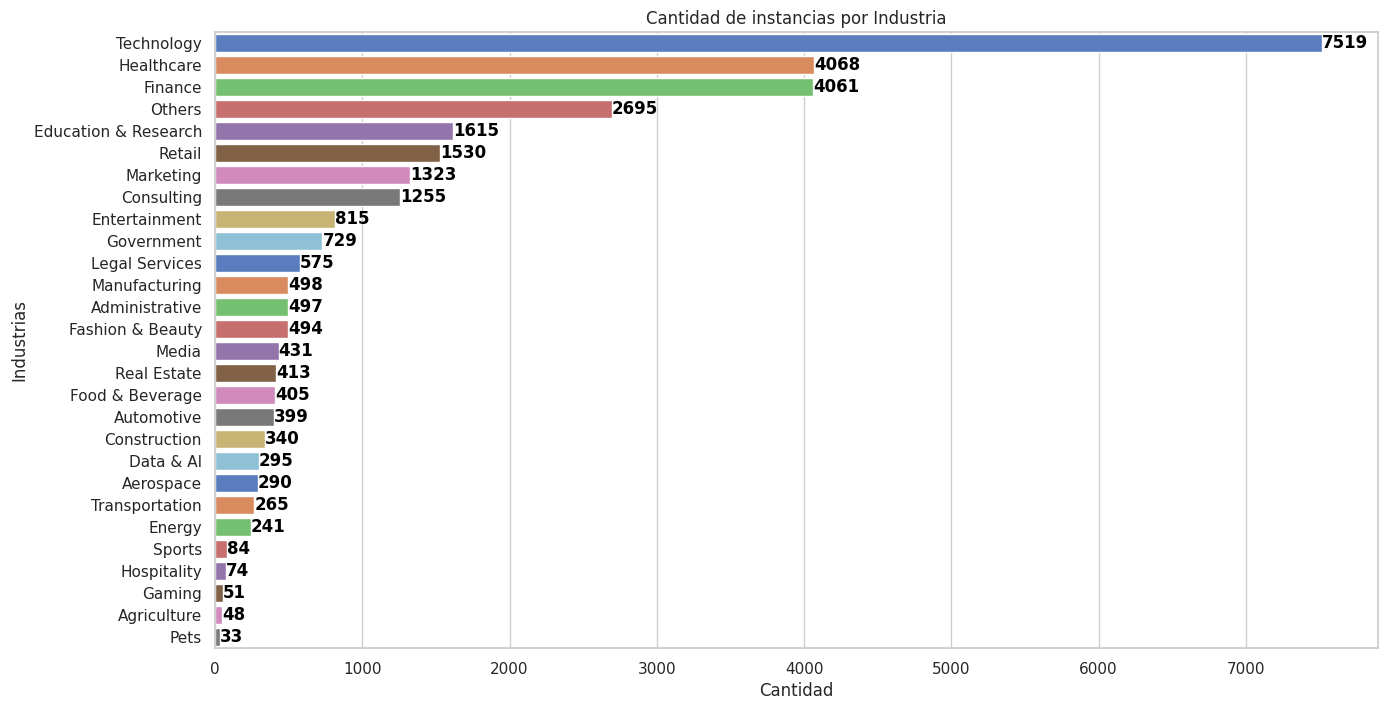

In [90]:
# Contar las instancias únicas de Industry
industry_counts = salaries_re_industry['GroupedIndustry'].value_counts()

# Ordenar en orden descendente
industry_counts = industry_counts.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(industry_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('Industrias')
plt.title('Cantidad de instancias por Industria')

plt.show()

In [91]:
salaries_re_industry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31043 entries, 0 to 32569
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age.Range            31043 non-null  object 
 1   Years.of.Experience  31043 non-null  float64
 2   Industry             31043 non-null  object 
 3   Job.Title            31043 non-null  object 
 4   Company.Name         31043 non-null  object 
 5   Education            31043 non-null  object 
 6   Country              31043 non-null  object 
 7   Gender               31043 non-null  object 
 8   Monthly.SalaryUSD    31043 non-null  float64
 9   Salary.Period        31043 non-null  object 
 10  GroupedIndustry      31043 non-null  object 
dtypes: float64(2), object(9)
memory usage: 2.8+ MB


#### 5.2.4. Puestos de Trabajo [Job.Title]

Se utilizará el mismo enfoque de agrupación por coincidencia de cadenas y expresiones regulares en la columna 'Job.Title'.

Esto permitirá simplificar la gran cantidad de títulos de trabajo únicos y obtener categorías más generales. Al agrupar los títulos de trabajo de esta manera, se facilitará el análisis y la interpretación de los datos, así como la identificación de patrones y tendencias.

Además, este enfoque simplificado será útil para modelar y predecir salarios basados en los títulos de trabajo.

In [92]:
# Calcular la frecuencia de las categorías en Job.Title
job_title_counts = salaries_re_industry['Job.Title'].value_counts()

print("Cantidad de Puestos de trabajo:", len(salaries_re_industry['Job.Title'].unique()))

job_title_counts

Cantidad de Puestos de trabajo: 12340


SOFTWARE ENGINEER                  446
ANALYST                            419
PROJECT MANAGER                    372
ASSOCIATE                          303
ACCOUNT MANAGER                    283
                                  ... 
DIGITAL TECH LEADERSHIP PROGRAM      1
AUDIT & ASSURANCE STAFF              1
ASSISTANT PROJECT ENGINEER           1
APPLICATION EXPERT                   1
MANAGER/CHEF                         1
Name: Job.Title, Length: 12340, dtype: int64

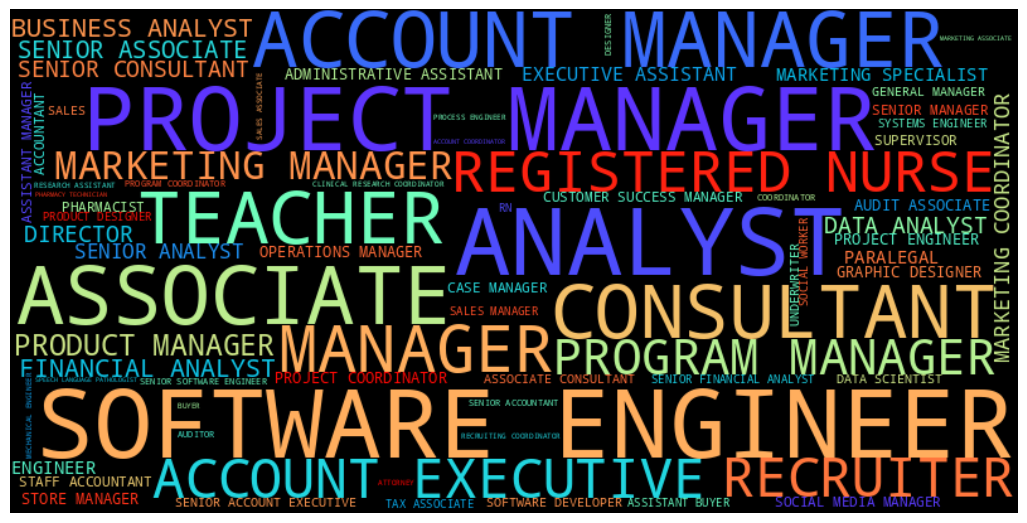

In [93]:
# Crea el objeto WordCloud con las palabras y sus respectivas frecuencias
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='rainbow',
                      contour_color='black', contour_width=1, max_words=75).generate_from_frequencies(job_title_counts)

# Configura el gráfico
plt.figure(figsize=(13, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Muestra el gráfico
plt.show()

Se agruparán los títulos de trabajo basándose en palabras clave obtenidas en el gráfico anterior del tipo Word Cloud y estableciendo un umbral de frecuencia mínima de 50 repeticiones. Esto mejorarà la interpretación y análisis al priorizar categorías más comunes.

In [94]:
# Crear una copia del dataset anterior
salaries_re_jobTitle = salaries_re_industry.copy()

keyword_patterns = {
    'Project/Program Manager': ['project manager', 'project management','project coordinator','Program Manager','PROGRAM COORDINATOR','PROJECT ADMINISTRATOR'],
    'Product Owner/Manager': ['product owner','product manager'],
    'Data Analyst': ['data analyst', 'data analysis'],
    'Data Scientist': ['data scientist','DATA ENGINEER'],
    'Data Engineer': ['DATA ENGINEER'],
    'Financial Analyst': ['financial analyst'],
    'Business Analyst': ['business analyst'],
    'Nurse': ['nurse', 'nursing','cna', 'rn'],
    'Developer': ['developer'],
    'Software Engineer': ['software engineer'],
    'Designer / UX': ['designer','UX'],
    'Teacher': ['teacher'],
    'Social Media Manager': ['Social Media Manager','Social Media'],
    'Consultant': ['consultant'],
    'Account Executive/Manager': ['account executive','account manager','ACCOUNT COORDINATOR'],
    'Director': ['director'],
    'Associate': ['associate'],
    'Assistant': ['assistant'],
    'Store Manager': ['store manager'],
    'Marketing Manager/Coordinator': ['marketing manager','marketing coordinator', 'MARKETING'],
    'Human Resourse / Recruiter': ['HR', 'human resourse','human resourser','recruiter','RECRUITING'],
    'Pharmaceutical': ['PHARMACEUTICAL','PHARMACIST','PHARMACY'],
    'Auditor': ['auditor'],
    'Testing & Quality Assurance': ['QA','test','testing','QUALITY ASSURANCE'],
    'Banker': ['BANKER'],
    'Dentist': ['dental', 'dentist','ORTHODONTIST'],
    'Underwriter': ['UNDERWRITER'],
    'Lawyer': ['law','PARALEGAL','ATTORNEY'],
    'Sales Manager': ['sales manager','sales'],
    'Operations Manager': ['operations manager'],
    'Buyer': ['buyer'],
    'Marketing Specialist': ['MARKETING SPECIALIST'],
    'Accountant': ['ACCOUNTANT'],
    'Therapist': ['THERAPIST'],
    'Researcher': ['researcher','research'],
    'V Level': ['VP', 'VICE PRESIDENT','AVP'],
    'C Level': ['CEO', 'OWNER'],
    'Social Worker': ['SOCIAL WORKER'],
    'Coordinator': ['COORDINATOR'],
    'Supervisor': ['Supervisor'],
    'Engineer': ['engineer'],
    'Specialist': ['SPECIALIST'],
    'Others Analyst': ['Analyst'],
    'Others Managers': ['Manager'],
}


# Función para realizar la agrupación por expresiones regulares y GroupedIndustry
def group_job_title(title, industry):
    if title in keyword_patterns:
        return title  # Si el Job.Title se encuentra en el diccionario, se mantiene el valor original
    else:
        for pattern_title, patterns in keyword_patterns.items():
            for pattern in patterns:
                if re.search(pattern, title, re.IGNORECASE):
                    return pattern_title
    return 'Others'  # Si no coincide con ninguna palabra clave, se mantiene el valor original

# Aplicar la agrupación por expresiones regulares y GroupedIndustry y crear una nueva columna 'GroupedJobTitle'
salaries_re_jobTitle['GroupedJobTitle'] = salaries_re_jobTitle.apply(lambda row: group_job_title(row['Job.Title'], row['GroupedIndustry']), axis=1)


# Calcular la frecuencia de las categorías en GroupedJobTitle
job_title_counts = salaries_re_jobTitle['GroupedJobTitle'].value_counts()
job_title_counts_filtered = job_title_counts[job_title_counts > 0]

with pd.option_context('display.max_rows', None):
    print(job_title_counts_filtered)


print("Cantidad de Puestos de Trabajo Agrupados es:", len(salaries_re_jobTitle['GroupedJobTitle'].unique()))


Others                           6512
Others Managers                  2344
Associate                        1999
Others Analyst                   1902
Assistant                        1400
Engineer                         1333
Consultant                       1141
Specialist                       1140
Project/Program Manager          1125
Nurse                            1108
Marketing Manager/Coordinator    1072
Director                          942
Account Executive/Manager         858
Coordinator                       710
Human Resourse / Recruiter        680
Designer / UX                     675
Sales Manager                     661
Software Engineer                 646
Teacher                           598
Product Owner/Manager             332
Accountant                        320
Supervisor                        303
Researcher                        294
Financial Analyst                 278
Business Analyst                  241
Pharmaceutical                    226
Social Media

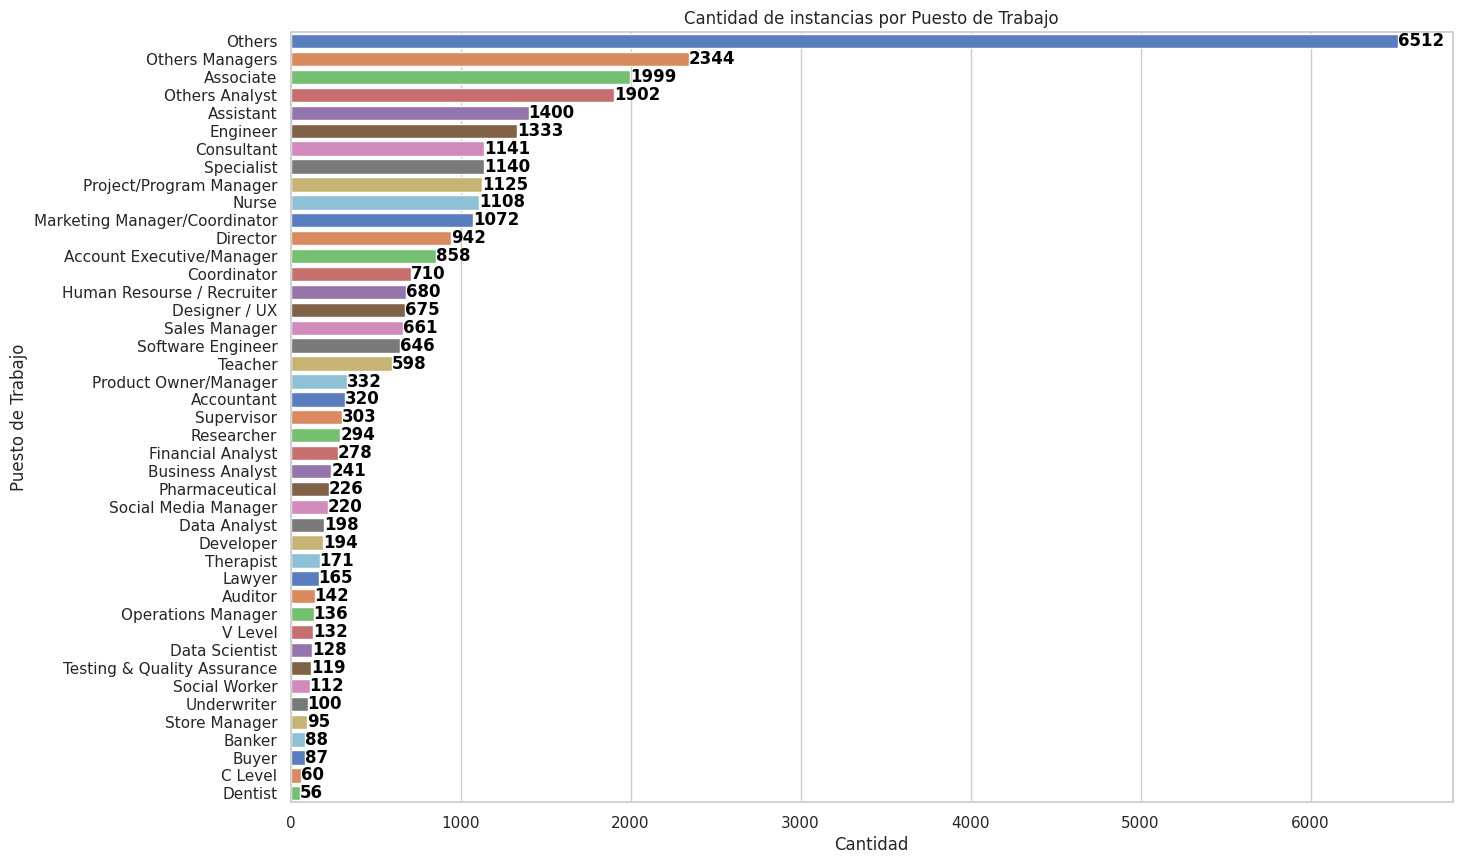

In [95]:
# Ordenar en orden descendente
job_title_counts = job_title_counts.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(job_title_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold')

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad')
plt.ylabel('Puesto de Trabajo')
plt.title('Cantidad de instancias por Puesto de Trabajo')

plt.show()

#### 5.2.5. País [Country]

In [96]:
# Crear una copia del dataset anterior
salaries_country = salaries_re_jobTitle.copy()

In [97]:
# Calcular la frecuencia de las categorías en Country
country_counts = salaries_country['Country'].value_counts()

In [98]:
# Calcular el porcentaje acumulado
country_cumsum = country_counts.cumsum() / country_counts.sum()

In [99]:
# Calcular el umbral para agrupar las categorías menos frecuentes
threshold = country_cumsum[country_cumsum > 0.995].index[0]

# Agrupar las categorías menos frecuentes en 'others'
salaries_country.loc[salaries_country['Country'].isin(country_counts[country_counts < country_counts[threshold]].index), 'Country'] = 'OTHERS'

# Verificar los resultados
print("Cantidad de Países:", len(salaries_country['Country'].unique()))

Cantidad de Países: 8


In [100]:
# Reemplaza "US" por "United States" en la columna "Country"
salaries_country['Country'] = salaries_country['Country'].replace('US', 'UNITED STATES')
salaries_country['Country'] = salaries_country['Country'].replace('UK', 'UNITED KINGDOM')

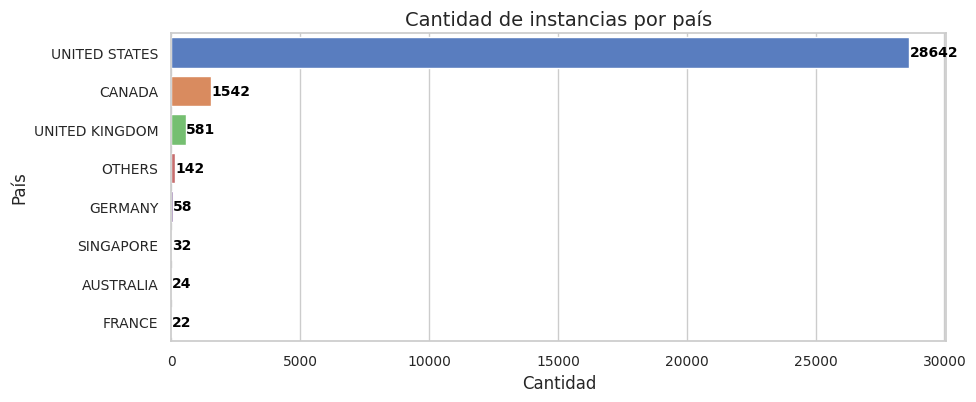

In [101]:
# Contar las instancias únicas de Country
country_counts = salaries_country['Country'].value_counts()

# Ordenar en orden descendente
country_counts = country_counts.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=country_counts.values, y=country_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(country_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold', fontsize=10)

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.title('Cantidad de instancias por país', fontsize=14)

# Cambiar el tamaño de las marcas de los ejes X e Y
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### 5.2.6. Empresa [Company.Name]

In [102]:
# Crear una copia del dataset anterior
salaries_company = salaries_country.copy()

In [103]:
# Genero agrupaciones o cambios de nombre para facilitar el manejo posterior de la API
groupings = {
    'META HEADQUARTERS': ['META'],
    'GOOGLEPLEX': ['GOOGLE'],
    'SALESFORCE TOWER': ['SALESFORCE'],
    'ERNST & YOUNG': ['Ernst & Young','EY'],
    "L'OREAL": ['LOREAL','LÂ€™OREAL',"L'OREAL",'LÂ€™ORÃ©AL'],
    "MCDONALD'S": ['MCDONALDS','MCDONALDÂ€™S'],
    'W/O COMPANY': ['ANONYMOUS','SELF-EMPLOYED','PRIVATE PRACTICE','START UP','.','SMALL BUSINESS','TECH COMPANY','LAW FIRM','CONFIDENTIAL',
                    'NONPROFIT','STARTUP','PUBLIC SCHOOL','HOSPITAL','PRIVATE','BANK','X','SCHOOL','REDACTED','UNIVERSITY','GOVERNMENT','AGENCY'] #Agrupo en W/O COMPANY los Company.Name que no representen a una empresa y que tengan mas de 20 repeticiones
}

# Función para agrupar categorías basadas en patrones de coincidencia
def group_company(company_name):
    for group, company_names in groupings.items():
      if company_name in company_names:
          return group
    return company_name

# Aplicar la función de agrupación a la columna 'Company.Name' y crear una nueva columna 'GroupedCompany'
salaries_company['GroupedCompany'] = salaries_company['Company.Name'].apply(group_company)


# Calcular la frecuencia de las categorías en GroupedCompany
company_counts = salaries_company['GroupedCompany'].value_counts()

# Reemplazar empresas con menos de 20 repeticiones por "OTHER"
salaries_company.loc[~salaries_company['GroupedCompany'].isin(company_counts[company_counts >= 20].index), 'GroupedCompany'] = 'OTHER'

# Calcular la frecuencia de las categorías nuevamente después del reemplazo
# company_counts_filtered = salaries_company['GroupedCompany'].value_counts()

# with pd.option_context('display.max_rows', None):
#     print(company_counts_filtered)


print("Cantidad de Empresas Agrupadas es:", len(salaries_company['GroupedCompany'].unique()))

Cantidad de Empresas Agrupadas es: 118


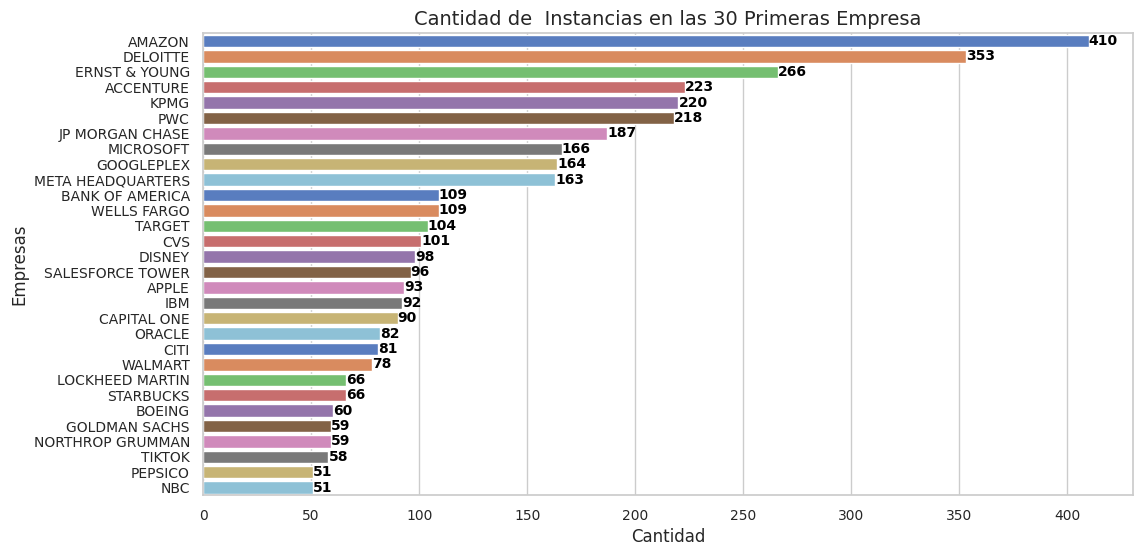

In [104]:
# Filtrar los datos 'W/O COMPANY' y 'OTHERS' de company_counts
filtered_counts = company_counts.drop(['W/O COMPANY', 'OTHERS'], errors='ignore')

# Obtener los primeros 20 valores
top_20_counts = filtered_counts.nlargest(30)

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_20_counts.values, y=top_20_counts.index, palette="muted")

# Agregar el número de cuentas en cada barra
for i, count in enumerate(top_20_counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', weight='bold', fontsize=10)

# Configurar los títulos y etiquetas de los ejes
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Empresas', fontsize=12)
plt.title('Cantidad de  Instancias en las 30 Primeras Empresa', fontsize=14)

# Cambiar el tamaño de las marcas de los ejes X e Y
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### 5.2.7. Conclusión de Reducción

In [105]:
# Crear una copia del dataset anterior
salaries_reduced = salaries_company.copy()

In [106]:
# Contar la cantidad de instancias únicas de las caracteristicas considerads como variables nominales

print("Cantidad de Rango de Edades Antes:", len(salaries['Age.Range'].unique()))
print("Cantidad de Rango de Edades Ahora:", len(salaries_reduced['Age.Range'].unique()))
print("----------------------------------------")
print("Cantidad de Años de Experiencia Antes:", len(salaries['Years.of.Experience'].unique()))
print("Cantidad de Años de Experiencia Ahora:", len(salaries_reduced['Years.of.Experience'].unique()))
print("----------------------------------------")
print("Cantidad de Industrias Antes:", len(salaries['Industry'].unique()))
print("Cantidad de Industrias Ahora:", len(salaries_reduced['GroupedIndustry'].unique()))
print("----------------------------------------")
print("Cantidad de Puestos de trabajo Antes:", len(salaries['Job.Title'].unique()))
print("Cantidad de Puestos de trabajo Ahora:", len(salaries_reduced['GroupedJobTitle'].unique()))
print("----------------------------------------")
print("Cantidad de Empresas Antes:", len(salaries['Company.Name'].unique()))
print("Cantidad de Empresas Ahora:", len(salaries_reduced['GroupedCompany'].unique()))
print("----------------------------------------")
print("Cantidad de Paises Antes:", len(salaries['Country'].unique()))
print("Cantidad de Paises Ahora:", len(salaries_reduced['Country'].unique()))
print("----------------------------------------")
print("Cantidad de Generos Antes:", len(salaries['Gender'].unique()))
print("Cantidad de Generos Ahora:", len(salaries_reduced['Gender'].unique()))

Cantidad de Rango de Edades Antes: 12
Cantidad de Rango de Edades Ahora: 11
----------------------------------------
Cantidad de Años de Experiencia Antes: 20
Cantidad de Años de Experiencia Ahora: 19
----------------------------------------
Cantidad de Industrias Antes: 5788
Cantidad de Industrias Ahora: 28
----------------------------------------
Cantidad de Puestos de trabajo Antes: 12918
Cantidad de Puestos de trabajo Ahora: 43
----------------------------------------
Cantidad de Empresas Antes: 15096
Cantidad de Empresas Ahora: 118
----------------------------------------
Cantidad de Paises Antes: 56
Cantidad de Paises Ahora: 8
----------------------------------------
Cantidad de Generos Antes: 3
Cantidad de Generos Ahora: 3


### 5.3. Enriquecimiento de datos con API Google Maps

In [107]:
!pip install googlemaps

import googlemaps

In [108]:
# Configura tu clave de API de Google Places
API_KEY = 'Colocar KEY de Google Maps'

Se generará un nuevo dataset que:

1. No contenga las instancias 'W/O COMPANY' y 'OTHER' de GroupedCompany, como tampoco OTHERS de Country.
2. De los filtrado en el punto anterior, nos quedaremos con las instancias unicas de GroupedCompany, pero que tengan el mismo Country.

In [109]:
# Paso 1: Filtrar instancias no deseadas en GroupedCompany y Country
salaries_gmaps = salaries_reduced[(salaries_reduced['GroupedCompany'] != 'W/O COMPANY') & (salaries_reduced['GroupedCompany'] != 'OTHERS')]
salaries_gmaps = salaries_gmaps[salaries_gmaps['Country'] != 'OTHERS']

# Paso 2: Agrupar por GroupedCompany y Country, manteniendo todas las filas únicas
grouped_companies = salaries_gmaps.groupby(['GroupedCompany', 'Country'], as_index=False).first()

# Paso 3: Crear un nuevo dataset solo con las columnas 'Company' y 'Country'
company_country = grouped_companies[['GroupedCompany', 'Country']].copy()

company_country

,GroupedCompany,Country
0,3M,UNITED STATES
1,ABBOTT,CANADA
2,ABBOTT,UNITED STATES
3,ACCENTURE,CANADA
4,ACCENTURE,GERMANY
...,...,...
236,WALGREENS,UNITED STATES
237,WALMART,CANADA
238,WALMART,UNITED STATES
239,WAYFAIR,UNITED STATES


In [110]:
# Crea una instancia del cliente de Google Maps
gmaps = googlemaps.Client(key=API_KEY)

# Función para obtener información adicional de una empresa en Google Maps
def gmaps_information(company, country):

    # Realiza la solicitud de búsqueda
    results = gmaps.places_autocomplete(f'{company}, {country}')

     # Verifica si se encontraron resultados y si la solicitud fue exitosa
    if len(results) > 0:
        place_id = results[0]['place_id']

        # Realiza la solicitud de detalles del lugar utilizando el Place ID
        detalles = gmaps.place(place_id)


        # Verifica si se encontraron detalles y si la solicitud fue exitosa
        if 'result' in detalles and detalles['status'] == 'OK':
            primer_resultado = detalles['result']

            # Obtener la información adicional de la empresa
            score = primer_resultado.get('rating', 'Puntuación no disponible')
            num_reviews = primer_resultado.get('user_ratings_total', 'Cantidad de reseñas no disponible')

            # Verificar si las coordenadas están disponibles
            if 'geometry' in primer_resultado and 'location' in primer_resultado['geometry']:
                coordinates = primer_resultado['geometry']['location']
            else:
                coordinates = 'Coordenadas no disponibles'

            # Devuelve la información obtenida
            return {'Score': score,
                    'Num_Reviews': num_reviews,
                    'Coordinates': coordinates
                    }
    else:
        # No se encontraron resultados
        return {'Error': 'No se encontraron resultados para la empresa'}

# Crear una lista para almacenar los resultados
company_results = []

# Iterar sobre cada fila del dataset
for _, row in company_country.iterrows():
    company = row['GroupedCompany']
    country = row['Country']

    try:
        # Obtener información adicional de la empresa
        company_information = gmaps_information(company, country)

    except googlemaps.exceptions.ApiError as e:

        # Si se produce el error ApiError, imprime el mensaje de error y utiliza el Place ID predeterminado
        print(f"Error en el llamado a la función: {e}")


        place_id = 'ChIJrTLr-GyuEmsRBfy61i59si0' # Place ID predeterminado
        detalles = gmaps.place(place_id)
        primer_resultado = detalles['result']
        score = primer_resultado.get('rating', 'Puntuación no disponible')
        num_reviews = primer_resultado.get('user_ratings_total', 'Cantidad de reseñas no disponible')

        # Verificar si las coordenadas están disponibles
        if 'geometry' in primer_resultado and 'location' in primer_resultado['geometry']:
            coordinates = primer_resultado['geometry']['location']
        else:
            coordinates = 'Coordenadas no disponibles'

        # Asignar la información obtenida con el Place ID predeterminado
        company_information = {'Score': score,
                               'Num_Reviews': num_reviews,
                               'Coordinates': coordinates
                               }
        # Agregar los resultados a la lista
    company_results.append({
        'GroupedCompany': company,
        'Country': country,
        'Score.Google.Maps': company_information.get('Score', ''),
        'Num.Reviews': company_information.get('Num_Reviews', ''),
        'Coordinates': company_information.get('Coordinates', {})
    })
# Crear un nuevo dataframe con los resultados
company_gmaps = pd.DataFrame(company_results)

company_gmaps

,GroupedCompany,Country,Score.Google.Maps,Num.Reviews,Coordinates
0,3M,UNITED STATES,4.2,61,"{'lat': 37.8353025, 'lng': -94.32948999999999}"
1,ABBOTT,CANADA,Puntuación no disponible,Cantidad de reseñas no disponible,"{'lat': 49.28154809999999, 'lng': -123.1073993}"
2,ABBOTT,UNITED STATES,Puntuación no disponible,Cantidad de reseñas no disponible,"{'lat': 31.8827464, 'lng': -97.07395849999999}"
3,ACCENTURE,CANADA,5,1,"{'lat': 43.6491616, 'lng': -79.3795568}"
4,ACCENTURE,GERMANY,4.7,338,"{'lat': 50.1751022, 'lng': 8.5280256}"
...,...,...,...,...,...
236,WALGREENS,UNITED STATES,4.1,40,"{'lat': 37.2228163, 'lng': -95.7101637}"
237,WALMART,CANADA,Puntuación no disponible,Cantidad de reseñas no disponible,"{'lat': 43.7137894, 'lng': -79.5532475}"
238,WALMART,UNITED STATES,3.7,8245,"{'lat': 36.6389801, 'lng': -93.259777}"
239,WAYFAIR,UNITED STATES,2.2,426,"{'lat': 42.3471641, 'lng': -71.07770529999999}"


In [111]:
pd.set_option("mode.use_inf_as_na", True)

# Paso 1: Crear un nuevo dataset company_gmaps_filtered
company_gmaps_filtered = company_gmaps.copy()

# Paso 2: Reemplazar valores no deseados con NaN en company_gmaps_filtered
company_gmaps_filtered['Score.Google.Maps'].replace({'Puntuación no disponible': np.nan}, inplace=True)
mask = company_gmaps_filtered['Score.Google.Maps'].isna()
company_gmaps_filtered.loc[mask, ['Num.Reviews', 'Coordinates']] = np.nan

company_gmaps_filtered

,GroupedCompany,Country,Score.Google.Maps,Num.Reviews,Coordinates
0,3M,UNITED STATES,4.2,61,"{'lat': 37.8353025, 'lng': -94.32948999999999}"
1,ABBOTT,CANADA,NaN,NaN,NaN
2,ABBOTT,UNITED STATES,NaN,NaN,NaN
3,ACCENTURE,CANADA,5,1,"{'lat': 43.6491616, 'lng': -79.3795568}"
4,ACCENTURE,GERMANY,4.7,338,"{'lat': 50.1751022, 'lng': 8.5280256}"
...,...,...,...,...,...
236,WALGREENS,UNITED STATES,4.1,40,"{'lat': 37.2228163, 'lng': -95.7101637}"
237,WALMART,CANADA,NaN,NaN,NaN
238,WALMART,UNITED STATES,3.7,8245,"{'lat': 36.6389801, 'lng': -93.259777}"
239,WAYFAIR,UNITED STATES,2.2,426,"{'lat': 42.3471641, 'lng': -71.07770529999999}"


In [112]:
#Fusionar datos entre salaries_reduced y company_gmaps_filtered
salaries_gmaps = pd.merge(salaries_reduced, company_gmaps_filtered, left_on=['GroupedCompany', 'Country'],
                       right_on=['GroupedCompany', 'Country'], how='left')

salaries_gmaps

,Age.Range,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Country,Gender,Monthly.SalaryUSD,Salary.Period,GroupedIndustry,GroupedJobTitle,GroupedCompany,Score.Google.Maps,Num.Reviews,Coordinates
0,18-21,3.0,GAMING,STREAMER,TWITCH,None,UNITED STATES,Male,40833.333333,Annual,Gaming,Others,OTHER,NaN,NaN,NaN
1,30-33,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,AESTHETIC CLINIC,Master's Degree,CANADA,Male,31691.088207,Annual,Healthcare,Nurse,OTHER,5,3,"{'lat': 43.6442169, 'lng': -79.39868600000001}"
2,18-21,1.0,ONLINE ARCADE,OWNER,RUST CLASH,High School/GED,UNITED STATES,Male,40000.000000,Annual,Gaming,C Level,OTHER,NaN,NaN,NaN
3,18-21,2.0,CRYPTO,HEAD OF MARKETING,REDACTED,Some College,UNITED STATES,Male,40000.000000,Annual,Others,Marketing Manager/Coordinator,W/O COMPANY,NaN,NaN,NaN
4,34-37,13.0,WINDOW COVERINGS,OWNER,CAROLINA BLIND CRAFTERS,Bachelor's Degree,UNITED STATES,Female,40000.000000,Annual,Others,C Level,OTHER,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31038,22-25,5.0,EDUCATION,PARAEDUCATOR,ELEMENTARY SCHOOL,Associate's Degree,UNITED STATES,Female,0.750000,Annual,Education & Research,Others,OTHER,NaN,NaN,NaN
31039,30-33,5.0,ECOMMERCE,DESIGN MANAGER,MIS,Bachelor's Degree,OTHERS,Male,0.092258,Monthly,Retail,Others Managers,OTHER,NaN,NaN,NaN
31040,22-25,5.0,HOTEL/RESTAURANT,MANAGER/CHEF,CASA BAROLO,Bachelor's Degree,OTHERS,Female,1.363698,Monthly,Food & Beverage,Others Managers,OTHER,NaN,NaN,NaN
31041,26-29,4.0,MATERIAL HANDLING,SOLUTIONS CONSULTANT,DEMATIC,Bachelor's Degree,UNITED STATES,Male,9166.666667,Annual,Others,Consultant,OTHER,NaN,NaN,NaN


## 6. Insights

### 6.1. Relación entre Salario y Puntuación de Google Maps

In [113]:
# Filtrar las instancias con Score.Google.Maps no NaN
salaries_gmaps_filtered = salaries_gmaps.dropna(subset=['Score.Google.Maps'])
salaries_gmaps_filtered = salaries_gmaps_filtered[salaries_gmaps_filtered['Score.Google.Maps'] != '']

# Calcular la frecuencia de las categorías en GroupedJobTitle
score_counts = salaries_gmaps_filtered['Score.Google.Maps'].value_counts()

salaries_gmaps_filtered

,Age.Range,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Country,Gender,Monthly.SalaryUSD,Salary.Period,GroupedIndustry,GroupedJobTitle,GroupedCompany,Score.Google.Maps,Num.Reviews,Coordinates
1,30-33,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,AESTHETIC CLINIC,Master's Degree,CANADA,Male,31691.088207,Annual,Healthcare,Nurse,OTHER,5,3,"{'lat': 43.6442169, 'lng': -79.39868600000001}"
13,18-21,4.0,TECH,L4,GOOGLE,Bachelor's Degree,UNITED STATES,Male,37916.666667,Annual,Technology,Others,GOOGLEPLEX,4.2,10226,"{'lat': 37.4220656, 'lng': -122.0840897}"
14,26-29,4.0,AUTO MOTIVE,DESIGNER MANAGER,GENERAL MOTORS,Master's Degree,UNITED STATES,Male,37750.000000,Annual,Others,Designer / UX,GENERAL MOTORS,4,260,"{'lat': 32.7367142, 'lng': -97.06591209999999}"
15,18-21,2.0,TECH,DATA ENGINEER,AMAZON,Bachelor's Degree,UNITED STATES,Male,37666.666667,Annual,Technology,Data Scientist,AMAZON,3.6,300,"{'lat': 47.62245530000001, 'lng': -122.3394743}"
33,18-21,1.0,CRYPTO,CEO,TBD PROTOCOL,Some College,CANADA,Male,27163.789892,Annual,Others,C Level,OTHER,5,3,"{'lat': 43.6442169, 'lng': -79.39868600000001}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31005,22-25,1.0,HEALTHCARE,SURGICAL PROCESSOR,AHS,Some College,CANADA,Female,1.487541,Annual,Healthcare,Others,OTHER,5,3,"{'lat': 43.6442169, 'lng': -79.39868600000001}"
31010,22-25,2.0,SALES,INSIDE SALES MANAGER,ADP,Bachelor's Degree,UNITED STATES,Female,1.666667,Annual,Retail,Sales Manager,ADP,2.6,25,"{'lat': 32.8084004, 'lng': -96.8459603}"
31011,26-29,5.0,HEALTH CARE,PERFORMANCE COACH,CIGNA,High School/GED,UNITED STATES,Female,1.666667,Annual,Healthcare,Others,CIGNA,2,32,"{'lat': 33.0224486, 'lng': -96.82832239999999}"
31028,18-21,1.0,HEALTHCARE,PHARMACY CASHIER,WALGREENS,High School/GED,UNITED STATES,Female,1.250000,Annual,Healthcare,Pharmaceutical,WALGREENS,4.1,40,"{'lat': 37.2228163, 'lng': -95.7101637}"


In [114]:
# Convertir 'Score.Google.Maps' a numérico, reemplazando las cadenas no deseadas por NaN
salaries_gmaps_filtered['Score.Google.Maps'] = pd.to_numeric(salaries_gmaps_filtered['Score.Google.Maps'], errors='coerce')

# Agrupar por GroupedCompany y Country y calcular el promedio de Score.Google.Maps, Monthly.SalaryUSD y Coordinates
salaries_grouped_avg = salaries_gmaps_filtered.groupby(['GroupedCompany', 'Country'], as_index=False).agg({
    'Score.Google.Maps': 'mean',
    'Monthly.SalaryUSD': 'mean',
    'Coordinates': 'first'
})
salaries_grouped_avg

<ipython-input-114-08632320f51e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GroupedCompany,Country,Score.Google.Maps,Monthly.SalaryUSD,Coordinates
0,3M,UNITED STATES,4.2,7439.183333,"{'lat': 37.8353025, 'lng': -94.32948999999999}"
1,ACCENTURE,CANADA,5.0,7414.605914,"{'lat': 43.6491616, 'lng': -79.3795568}"
2,ACCENTURE,GERMANY,4.7,6086.894635,"{'lat': 50.1751022, 'lng': 8.5280256}"
3,ACCENTURE,UNITED KINGDOM,4.6,6395.537845,"{'lat': 51.5113402, 'lng': -0.0822432}"
4,ACCENTURE,UNITED STATES,4.6,8560.221032,"{'lat': 32.8703634, 'lng': -96.9395894}"
...,...,...,...,...,...
186,VMWARE,UNITED STATES,4.7,9065.526515,"{'lat': 33.9299831, 'lng': -84.35099360000001}"
187,WALGREENS,UNITED STATES,4.1,5592.777778,"{'lat': 37.2228163, 'lng': -95.7101637}"
188,WALMART,UNITED STATES,3.7,6744.008216,"{'lat': 36.6389801, 'lng': -93.259777}"
189,WAYFAIR,UNITED STATES,2.2,6517.307692,"{'lat': 42.3471641, 'lng': -71.07770529999999}"


In [115]:
# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[0, 0], zoom_start=2, width=1100, height=600)

# Iterar sobre los datos del dataset
for _, row in salaries_grouped_avg.iterrows():
    latitud = row['Coordinates']['lat']
    longitud = row['Coordinates']['lng']
    nombre_empresa = row['GroupedCompany']
    sueldo = round(row['Monthly.SalaryUSD'],2)
    puntuacion = row['Score.Google.Maps']

    # Crear el texto emergente con los datos adicionales
    popup_text = f"<strong>{nombre_empresa}</strong><br>" \
                 f"<strong>Sueldo promedio:</strong> ${sueldo}<br>" \
                 f"<strong>Puntuación en Google Maps:</strong> {puntuacion}/5"

    # Agregar un marcador en cada ubicación
    folium.Marker(
        location=[latitud, longitud],
        popup=folium.Popup(html=popup_text, max_width=300),
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mapa)

# Mostrar el mapa
mapa

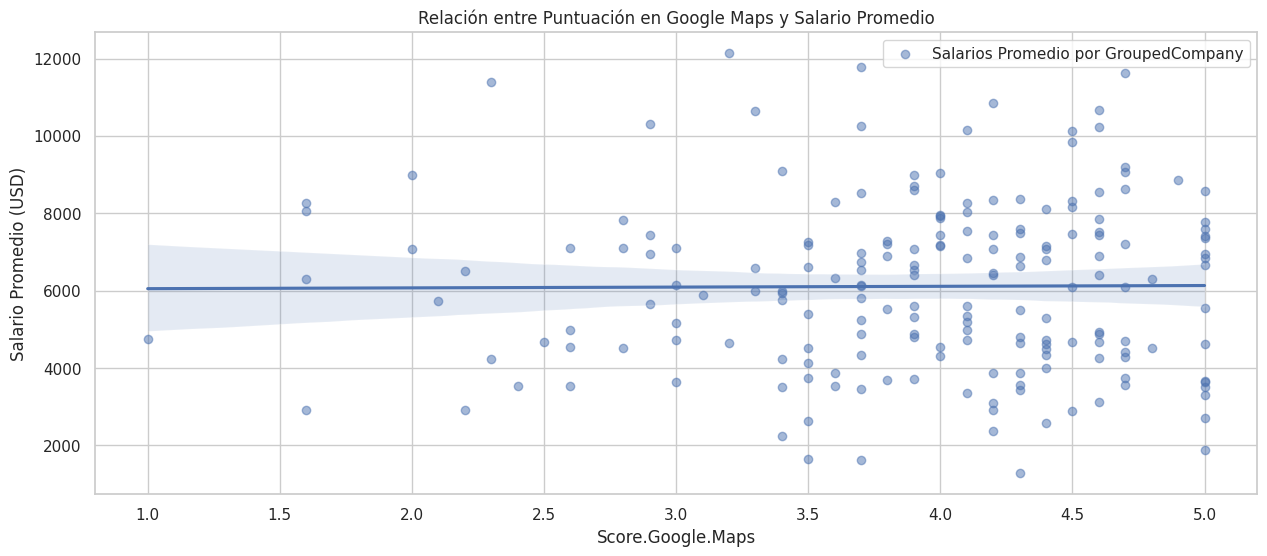

In [116]:
# Gráfico de dispersión con línea de regresión: Score.Google.Maps vs Salario Promedio por GroupedCompany
plt.figure(figsize=(15, 6))
sns.regplot(data=salaries_grouped_avg, x='Score.Google.Maps', y='Monthly.SalaryUSD', scatter_kws={'alpha':0.5}, label='Salarios Promedio por GroupedCompany')
plt.xlabel('Score.Google.Maps')
plt.ylabel('Salario Promedio (USD)')
plt.title('Relación entre Puntuación en Google Maps y Salario Promedio')
plt.legend()
plt.show()

In [117]:
# Ajustar un modelo lineal y obtener la ecuación de la línea de regresión para salaries_grouped_avg
slope, intercept, r_value, p_value, std_err = stats.linregress(salaries_grouped_avg['Score.Google.Maps'], salaries_grouped_avg['Monthly.SalaryUSD'])
equation_grouped = f"Salario Promedio (USD) = {slope:.2f} * Score.Google.Maps + {intercept:.2f}"

# Imprimir las ecuaciones de la línea de regresión
print("Ecuación de la línea de regresión para salaries_grouped_avg:", equation_grouped)

Ecuación de la línea de regresión para salaries_grouped_avg: Salario Promedio (USD) = 20.26 * Score.Google.Maps + 6030.59


El coeficiente de 98.45 nos indica que hay una relación positiva entre la puntuación de Google Maps y el salario promedio de las empresas, lo que significa que un aumento en la puntuación de Google Maps se podría asocia con un aumento en el salario promedio.

Sin embargo, el valor del coeficiente no es muy grande (98.45), lo que sugiere que el impacto de la puntuación de Google Maps en el salario promedio no es tan significativo. En otras palabras, la relación entre estas dos variables es positiva, pero la puntuación de Google Maps no es el único o el factor más influyente en la determinación de los salarios.

Por lo tanto, podemos concluir que aunque existe una relación positiva entre la puntuación de Google Maps y el salario promedio para cada combinación única de GroupedCompany y Country, esta relación no es tan fuerte, y otros factores también pueden estar desempeñando un papel importante en la determinación de los salarios en el conjunto de datos salaries_gmaps.

### 6.2. Salarios promedios según la Industria


<ipython-input-118-80bd2e1b9d1d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



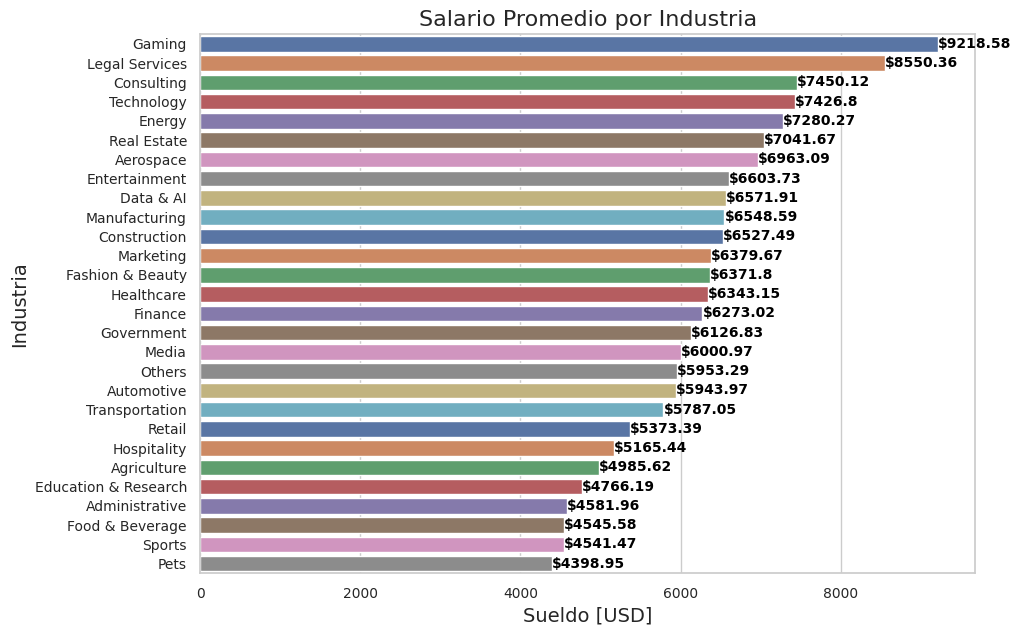

In [118]:
filtered_salaries = salaries_gmaps.groupby('GroupedIndustry').mean().sort_values(by='Monthly.SalaryUSD', ascending=False).reset_index()

# Graficar el salario promedio por país
plt.figure(figsize=(10,7))
sns.barplot(x='Monthly.SalaryUSD', y='GroupedIndustry', data=filtered_salaries, palette="deep")

# Mostrar valores de X en las barras
for i, v in enumerate(filtered_salaries['Monthly.SalaryUSD']):
    plt.text(v, i, f"${str(round(v,2))}", color='black', va='center',weight='bold', fontsize=10)

plt.title('Salario Promedio por Industria',fontsize=16)
plt.xlabel('Sueldo [USD]',fontsize=14)
plt.ylabel('Industria',fontsize=14)

# Cambiar el tamaño de las marcas de los ejes X e Y
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Las industrias asociadas a la tecnología, como "Data & AI", "Consulting", "Energy", "Entertainment", "Gaming" y "Technology", o las asociadas a servicios especializados, como "Legal Services" o "Real Estate", tienen salarios promedios más altos, mientras que las industrias relacionadas con "Pets", "Sports", "Food & Beverage", "Administrative" y "Education & Research" tienen salarios promedios más bajos.

Esta información sugiere que, en general, las industrias de tecnología y servicios especializados suelen estar relacionadas con áreas especializadas y de alta demanda en el mercado laboral. Estas industrias a menudo requieren habilidades técnicas, conocimientos avanzados y experiencia específica, lo que puede conducir a una mayor valoración de los empleados y, por lo tanto, a salarios más altos.

Por otro lado, las industrias con salarios promedios más bajos, a menudo se asocian con roles más generales o servicios básicos que pueden no requerir habilidades altamente especializadas. Esto puede resultar en una menor valoración salarial en comparación con industrias que demandan una capacitación más especializada.


### 6.3. Distribución de Educación por Industria

Se va a establecer una secuencia gradual de niveles educativos, organizados desde la ausencia de educación hasta el nivel más alto de logro académico.

In [119]:
education_order = ['None',
                   'High School/GED',
                   'Trade/Vocational',
                   'Some College',
                   "Associate's Degree",
                   "Bachelor's Degree",
                   "Master's Degree",
                   'Doctorate Degree'
                   ]

salaries_education = salaries_gmaps.copy()

In [120]:
# Crea un DataFrame pivote para la educación y GroupedIndustry
pivot_df = salaries_education.pivot_table(index='GroupedIndustry', columns='Education', aggfunc='size', fill_value=0)
pivot_df = pivot_df[education_order]  # Reordena las columnas según education_order

# Convierte a porcentajes
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Calcula el salario promedio por industria
average_salary_by_industry = salaries_education.groupby('GroupedIndustry')['Monthly.SalaryUSD'].mean().sort_values(ascending=False)

# Ordena el DataFrame pivote según el salario promedio descendente
pivot_df_percentage = pivot_df_percentage.loc[average_salary_by_industry.index]

# Crea el Stacked Area Plot utilizando plotly
fig = px.area(pivot_df_percentage, title='Distribución de Educación por Industria',
              labels={'GroupedIndustry': 'Industria', 'value': 'Porcentaje'},
              color_discrete_sequence=px.colors.qualitative.Set3,
              category_orders={"GroupedIndustry": average_salary_by_industry.index})
fig.show()

Al analizar la distribución educativa en distintas industrias, destacan patrones que reflejan la relación entre formación académica y empleo.

En tecnología y videojuegos, se valora educación avanzada, como Licenciaturas y Maestrías, enfatizando habilidades técnicas.

En áreas legales e investigación, se inclinan por niveles educativos superiores, como Doctorados, apuntando a habilidades especializadas.

No obstante, sectores como hospitalidad y venta minorista muestran proporciones más altas de niveles educativos básicos, señalando posibles influencias adicionales en la determinación salarial.

En resumen, la distribución educativa varía en las industrias, revelando la compleja relación entre educación y salario, influenciada por contextos específicos.







### 6.4. Diferencias Salariales en función del Género


Con el propósito de examinar posibles disparidades salariales en función del género, se procederá a filtrar del conjunto de datos aquellos puestos de trabajo que presenten únicamente un solo tipo de género. De esta manera, nos enfocaremos en los grupos de empleos que cuentan con una diversidad de géneros (2 o 3), lo que permitirá un análisis más específico sobre posibles diferencias salariales entre géneros en esos casos.

In [121]:
# Filtrar los GroupedJobTitle que tengan 2 o 3 Gender únicos
grouped_job_titles = salaries_gmaps.groupby('GroupedJobTitle')['Gender'].nunique()
selected_grouped_job_titles = grouped_job_titles[grouped_job_titles.isin([2, 3])].index

<ipython-input-122-95fc24a01543>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




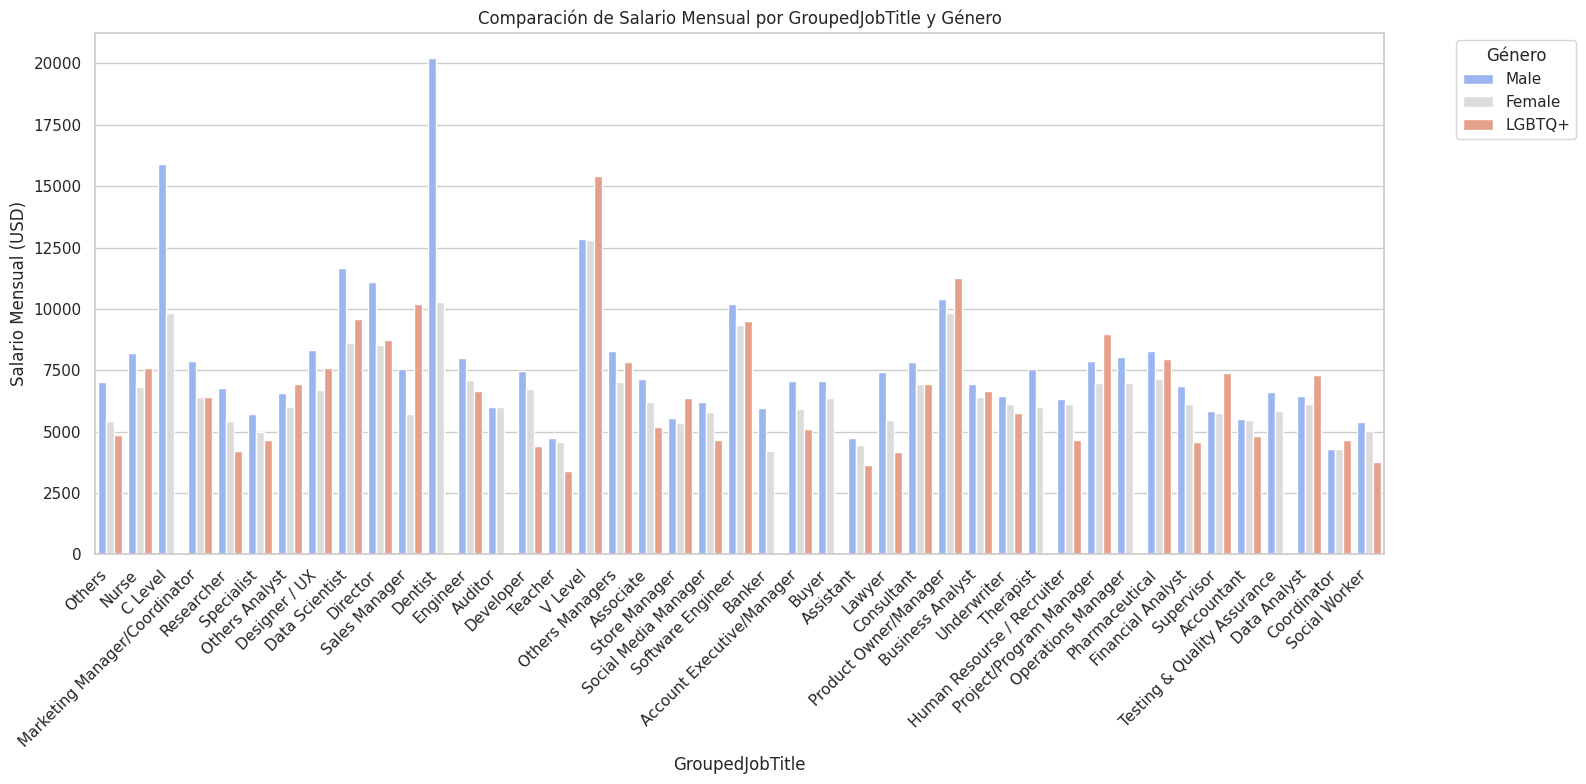

In [122]:
# Filtrar los datos por los GroupedJobTitle seleccionados
selected_data = salaries_gmaps[salaries_gmaps['GroupedJobTitle'].isin(selected_grouped_job_titles)]

# Gráfico comparativo de Monthly.SalaryUSD para los GroupedJobTitle seleccionados
plt.figure(figsize=(16, 8))
sns.barplot(data=selected_data, x='GroupedJobTitle', y='Monthly.SalaryUSD', hue='Gender', palette='coolwarm', ci=None)
plt.xlabel('GroupedJobTitle')
plt.ylabel('Salario Mensual (USD)')
plt.title('Comparación de Salario Mensual por GroupedJobTitle y Género')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Tras una primera observación del gráfico barplot, es evidente que el género masculino exhibe un salario promedio más alto en puestos similares. Para enriquecer el análisis y comprender mejor la relación entre las variables, se empleará un gráfico regplot, que permitirá visualizar las líneas de regresión lineal.

Esto nos ayudará a examinar de manera más detallada las tendencias y posibles correlaciones entre el género y el salario, proporcionando una perspectiva más completa de la situación salarial en función del género.

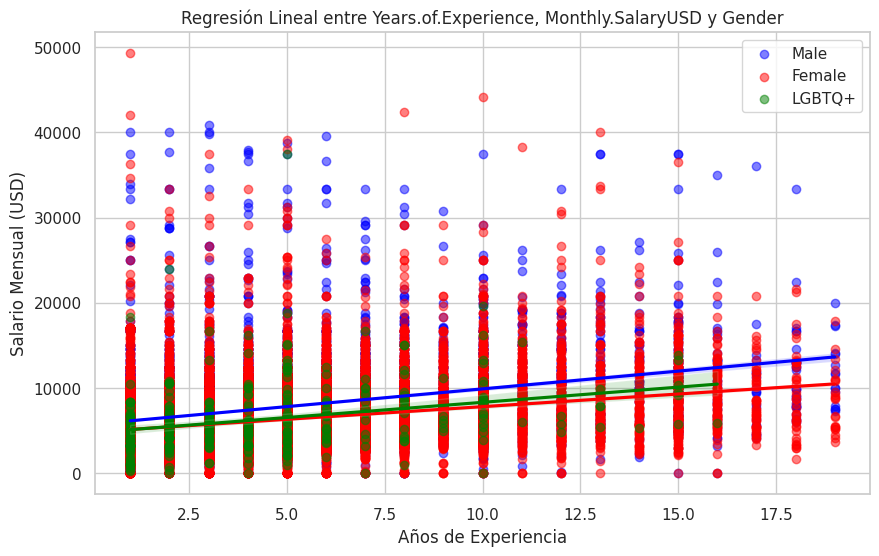

In [123]:
# Crear gráfico de dispersión con regresión lineal para cada género
plt.figure(figsize=(10, 6))
sns.regplot(data=selected_data[selected_data['Gender'] == 'Male'], x='Years.of.Experience', y='Monthly.SalaryUSD', scatter_kws={'alpha':0.5}, label='Male', color='blue')
sns.regplot(data=selected_data[selected_data['Gender'] == 'Female'], x='Years.of.Experience', y='Monthly.SalaryUSD', scatter_kws={'alpha':0.5}, label='Female', color='red')
sns.regplot(data=selected_data[selected_data['Gender'] == 'LGBTQ+'], x='Years.of.Experience', y='Monthly.SalaryUSD', scatter_kws={'alpha':0.5}, label='LGBTQ+', color='green')

plt.xlabel('Años de Experiencia')
plt.ylabel('Salario Mensual (USD)')
plt.title('Regresión Lineal entre Years.of.Experience, Monthly.SalaryUSD y Gender')
plt.legend()
plt.show()

In [124]:
# Filtrar los datos por los géneros seleccionados
male_data = selected_data[selected_data['Gender'] == 'Male']
female_data = selected_data[selected_data['Gender'] == 'Female']
lgbtq_data = selected_data[selected_data['Gender'] == 'LGBTQ+']

# Función para obtener la ecuación de la línea de regresión
def get_regression_equation(x, y):
    slope, intercept, _, _, _ = linregress(x, y)
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    return equation

# Obtener las ecuaciones de regresión para cada género
male_equation = get_regression_equation(male_data['Years.of.Experience'], male_data['Monthly.SalaryUSD'])
female_equation = get_regression_equation(female_data['Years.of.Experience'], female_data['Monthly.SalaryUSD'])
other_equation = get_regression_equation(lgbtq_data['Years.of.Experience'], lgbtq_data['Monthly.SalaryUSD'])

# Imprimir las ecuaciones de regresión
print("Ecuación de regresión para género Masculino:", male_equation)
print("Ecuación de regresión para género Femenino:", female_equation)
print("Ecuación de regresión para género LGBTQ+:", other_equation)

Ecuación de regresión para género Masculino: y = 416.50x + 5737.53
Ecuación de regresión para género Femenino: y = 296.97x + 4845.55
Ecuación de regresión para género LGBTQ+: y = 356.49x + 4758.21



En base a las ecuaciones de regresión obtenidas, se observa que existen diferencias significativas en la relación entre el salario promedio y los años de experiencia para cada género. Estas diferencias son importantes ya que indican disparidades salariales entre los géneros.

El género masculino muestra el mayor incremento en el salario promedio con respecto a los años de experiencia, seguido por el género LGBTQ+ y, por último, el género femenino. Esta discrepancia sugiere que, en promedio, los hombres experimentan un mayor crecimiento salarial en comparación con las mujeres y personas LGBTQ+ con niveles de experiencia similares.